In [1]:
import pandas as pd
import numpy as np

In [2]:
dataset=pd.read_excel("jobs.xlsx")
df=pd.DataFrame(dataset)
df.head(10)


,Job Title,Company Name,Job Location,Job Salary,Job Tags
0,Hiring For Rolling Mill Operator With German L...,2Coms Consulting Pvt Ltd.,Bhubaneswar,"₹149,999 - ₹149,999 monthly","Work from Office, Full Time, Min. 2 years, Bas..."
1,Center Manager,Bajaj Finance Limited,Khordha,"₹100,000 - ₹144,000 monthly*","Field Job, Full Time, Any experience, No Engli..."
2,Hiring For General Maintenance Supervisor To W...,2Coms Consulting Pvt Ltd.,Bhubaneswar,"₹84,176 - ₹84,176 monthly","Work from Office, Full Time, Min. 3 years, Goo..."
3,Piping Design Engineer,Fiama Techno Engineering Service,"Kalinga Nagar, Bhubaneswar Region","₹70,000 - ₹80,000 monthly","Work from Office, Full Time, Min. 5 years, Goo..."
4,Delivery Boy,M/S Talk Bridge Consultancy,Bhubaneswar,"₹40,000 - ₹90,000 monthly*","Field Job, Part Time, Full Time, Any experienc..."
5,Retail Partner,Bajaj Allianz Life Insurance Company Limited,Work from home,"₹18,000 - ₹82,000 monthly*","Part Time, Full Time, Any experience, Basic En..."
6,Retail Partner,Bajaj Allianz Life Insurance Company Limited,Work from home,"₹18,000 - ₹117,000 monthly*","Part Time, Full Time, Any experience, No Engli..."
7,Delivery Boy Biker,Blinkit Private Limited,Bhubaneswar,"₹40,000 - ₹85,000 monthly*","Field Job, Part Time, Full Time, Any experienc..."
8,Delivery Boy Biker,Blinkit Private Limited,Bhubaneswar,"₹40,000 - ₹85,000 monthly*","Field Job, Part Time, Full Time, Any experienc..."
9,Delivery Boy,Blinkit Private Limited,Bhubaneswar,"₹40,000 - ₹85,000 monthly*","Field Job, Part Time, Full Time, Any experienc..."


In [3]:
df.describe()

,Job Title,Company Name,Job Location,Job Salary,Job Tags
count,313,313,313,313,313
unique,191,187,60,203,54
top,Business Development Manager (BDM),Bajaj Allianz Life Insurance Company Limited,Bhubaneswar,"₹15,000 - ₹20,000 monthly","Work from Office, Full Time, Any experience, B..."
freq,10,51,77,11,75


In [4]:
print("No of rows and columns:",df.shape)
print(df.info)

No of rows and columns: (313, 5)
<bound method DataFrame.info of                                              Job Title  \
0    Hiring For Rolling Mill Operator With German L...   
1                                       Center Manager   
2    Hiring For General Maintenance Supervisor To W...   
3                               Piping Design Engineer   
4                                         Delivery Boy   
..                                                 ...   
308                                    Store Assistant   
309                                Marketing Executive   
310                           Team Leader - Operations   
311                                               AABP   
312                                  Financial Advisor   

                                     Company Name  \
0                       2Coms Consulting Pvt Ltd.   
1                           Bajaj Finance Limited   
2                       2Coms Consulting Pvt Ltd.   
3                Fiama Tec

In [5]:
df.dtypes

Job Title       object
Company Name    object
Job Location    object
Job Salary      object
Job Tags        object
dtype: object

In [6]:
if df.isnull().bool:
    print("No of NULL Values",df.isnull().sum())
else:
    print("There are no NULL values")

No of NULL Values Job Title       0
Company Name    0
Job Location    0
Job Salary      0
Job Tags        0
dtype: int64


In [7]:
df.head()

,Job Title,Company Name,Job Location,Job Salary,Job Tags
0,Hiring For Rolling Mill Operator With German L...,2Coms Consulting Pvt Ltd.,Bhubaneswar,"₹149,999 - ₹149,999 monthly","Work from Office, Full Time, Min. 2 years, Bas..."
1,Center Manager,Bajaj Finance Limited,Khordha,"₹100,000 - ₹144,000 monthly*","Field Job, Full Time, Any experience, No Engli..."
2,Hiring For General Maintenance Supervisor To W...,2Coms Consulting Pvt Ltd.,Bhubaneswar,"₹84,176 - ₹84,176 monthly","Work from Office, Full Time, Min. 3 years, Goo..."
3,Piping Design Engineer,Fiama Techno Engineering Service,"Kalinga Nagar, Bhubaneswar Region","₹70,000 - ₹80,000 monthly","Work from Office, Full Time, Min. 5 years, Goo..."
4,Delivery Boy,M/S Talk Bridge Consultancy,Bhubaneswar,"₹40,000 - ₹90,000 monthly*","Field Job, Part Time, Full Time, Any experienc..."


In [8]:
#adding max min and avg salary
def clean_salary(sal):
    if pd.isna(sal):
        return np.nan, np.nan
    sal = (sal.replace('₹', '')
              .replace(',', '')
              .replace('monthly','')
              .replace('*','')
              .strip())
    parts = sal.split('-')
    if len(parts) == 2:
        min_sal = float(parts[0].strip())
        max_sal = float(parts[1].strip())
    else:  # single value
        min_sal = max_sal = float(parts[0].strip())
    return min_sal, max_sal

df[['Job_Min_salary', 'Job_Max_salary']] = df['Job Salary'].apply(lambda x: pd.Series(clean_salary(x)))

df['Job_Avg_salary'] = (df['Job_Min_salary'] + df['Job_Max_salary']) / 2


In [9]:
df.head()

,Job Title,Company Name,Job Location,Job Salary,Job Tags,Job_Min_salary,Job_Max_salary,Job_Avg_salary
0,Hiring For Rolling Mill Operator With German L...,2Coms Consulting Pvt Ltd.,Bhubaneswar,"₹149,999 - ₹149,999 monthly","Work from Office, Full Time, Min. 2 years, Bas...",149999.0,149999.0,149999.0
1,Center Manager,Bajaj Finance Limited,Khordha,"₹100,000 - ₹144,000 monthly*","Field Job, Full Time, Any experience, No Engli...",100000.0,144000.0,122000.0
2,Hiring For General Maintenance Supervisor To W...,2Coms Consulting Pvt Ltd.,Bhubaneswar,"₹84,176 - ₹84,176 monthly","Work from Office, Full Time, Min. 3 years, Goo...",84176.0,84176.0,84176.0
3,Piping Design Engineer,Fiama Techno Engineering Service,"Kalinga Nagar, Bhubaneswar Region","₹70,000 - ₹80,000 monthly","Work from Office, Full Time, Min. 5 years, Goo...",70000.0,80000.0,75000.0
4,Delivery Boy,M/S Talk Bridge Consultancy,Bhubaneswar,"₹40,000 - ₹90,000 monthly*","Field Job, Part Time, Full Time, Any experienc...",40000.0,90000.0,65000.0


In [12]:
#copying the df to a new df for filtering and keeping the raw file safe
df_main=df
df_main.to_excel("jobs_analysis.xlsx",index=False)

# Working with the New copied File 

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_excel("jobs_analysis.xlsx")
df.head()

,Job Title,Company Name,Job Location,Job Salary,Job Tags,Job_Max_salary,Job_Min_salary,Job_avg_salary,Job_Avg_salary
0,Hiring For Rolling Mill Operator With German L...,2Coms Consulting Pvt Ltd.,Bhubaneswar,"₹149,999 - ₹149,999 monthly","Work from Office, Full Time, Min. 2 years, Bas...",149999,149999,149999.0,149999.0
1,Center Manager,Bajaj Finance Limited,Khordha,"₹100,000 - ₹144,000 monthly*","Field Job, Full Time, Any experience, No Engli...",144000,100000,122000.0,122000.0
2,Hiring For General Maintenance Supervisor To W...,2Coms Consulting Pvt Ltd.,Bhubaneswar,"₹84,176 - ₹84,176 monthly","Work from Office, Full Time, Min. 3 years, Goo...",84176,84176,84176.0,84176.0
3,Piping Design Engineer,Fiama Techno Engineering Service,"Kalinga Nagar, Bhubaneswar Region","₹70,000 - ₹80,000 monthly","Work from Office, Full Time, Min. 5 years, Goo...",80000,70000,75000.0,75000.0
4,Delivery Boy,M/S Talk Bridge Consultancy,Bhubaneswar,"₹40,000 - ₹90,000 monthly*","Field Job, Part Time, Full Time, Any experienc...",90000,40000,65000.0,65000.0


In [13]:
df.describe()

,Job_Min_salary,Job_Max_salary,Job_Avg_salary
count,313.000000,313.000000,313.000000
mean,18237.779553,37587.741214,27912.760383
std,13408.330114,26150.593735,18214.417627
min,0.000000,8000.000000,7500.000000
25%,11500.000000,17500.000000,15000.000000
50%,15000.000000,26000.000000,21000.000000
75%,20000.000000,52000.000000,38500.000000
max,149999.000000,149999.000000,149999.000000


In [14]:
df[df["Job_Max_salary"].isnull()]

,Job Title,Company Name,Job Location,Job Salary,Job Tags,Job_Min_salary,Job_Max_salary,Job_Avg_salary


In [15]:
avg_salary=df["Job_Avg_salary"].mean()
print("The average salary for jobs posted in Bhubaneswar:",avg_salary)

The average salary for jobs posted in Bhubaneswar: 27912.760383386583


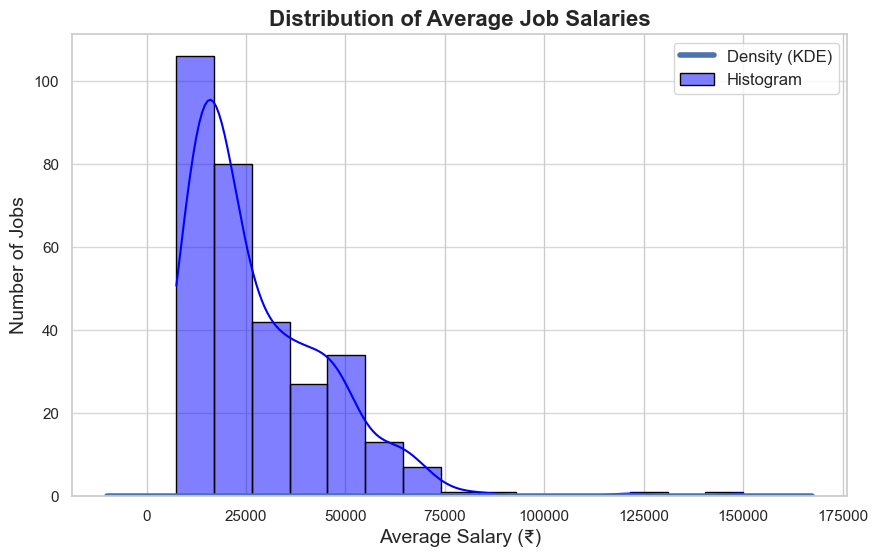

In [ ]:
#The graph tells us about how the average job salaries are distributed, where most jobs are concentrated, and highlights trends or clusters in salary ranges.

plt.figure(figsize=(10,6))

# Histogram with label
sns.histplot(
    df['Job_Avg_salary'], 
    bins=15, 
    kde=True,                # adds a smooth density curve
    color='blue',         # histogram color
    edgecolor='black',       # border for bars
    label='Histogram'        # label for legend
)

# Add KDE label separately
sns.kdeplot(
    df['Job_Avg_salary'], 
    linewidth=4, 
    label='Density (KDE)'
)

# Titles and labels
plt.title("Distribution of Average Job Salaries", fontsize=16, fontweight='bold')
plt.xlabel("Average Salary (₹)", fontsize=14)
plt.ylabel("Number of Jobs", fontsize=14)

# Add grid
plt.grid(axis='y', alpha=0.75)

# Show legend
plt.legend(fontsize=12)

plt.show()

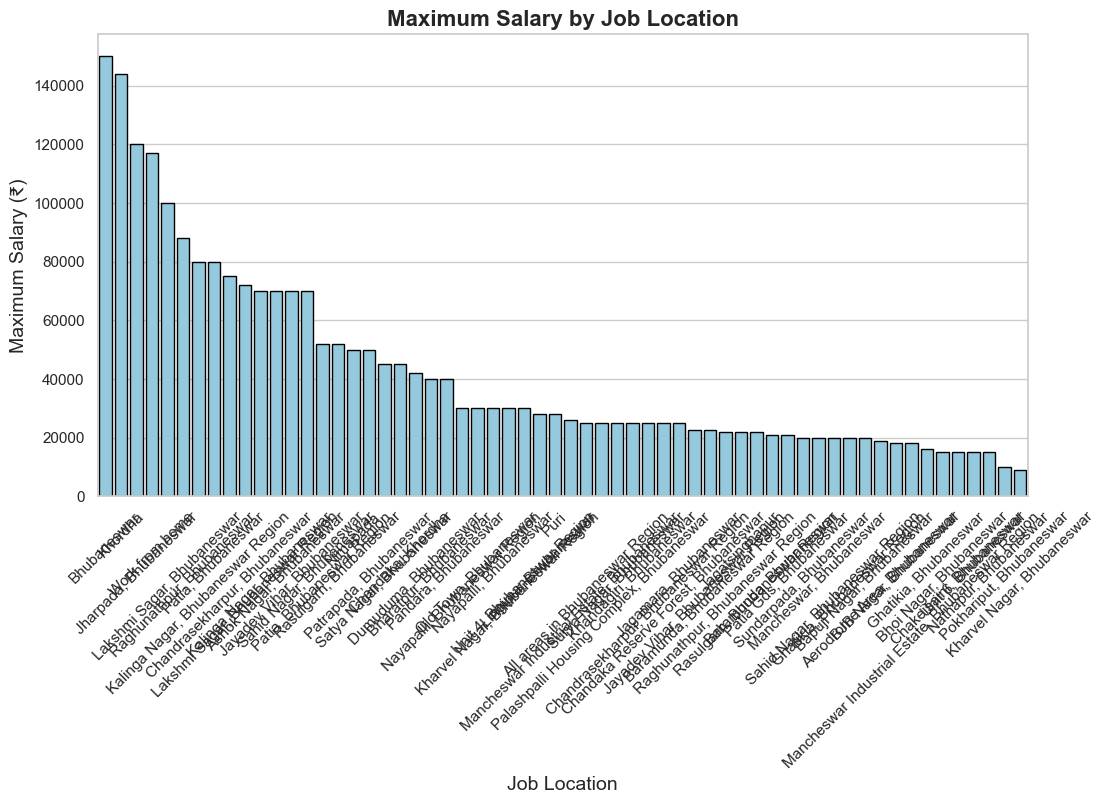

In [40]:
sns.set(style="whitegrid")

df_loc_max = df.groupby('Job Location')['Job_Max_salary'].max().sort_values(ascending=False).reset_index()

plt.figure(figsize=(12,6))
sns.barplot(x='Job Location', y='Job_Max_salary', data=df_loc_max, color='skyblue', edgecolor='black')
plt.title("Maximum Salary by Job Location", fontsize=16, fontweight='bold')
plt.xlabel("Job Location", fontsize=14)
plt.ylabel("Maximum Salary (₹)", fontsize=14)
plt.xticks(rotation=45)
plt.show()
plt.show()